In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [2]:
white = pd.read_csv('winequality-white.csv',sep = ';')
red = pd.read_csv('winequality-red.csv',sep = ';')

In [3]:
color_w = ['w']* len(white)
white['color'] = color_w

color_r = ['r']* len(red)
red['color'] = color_r

In [4]:
red.head()
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,w
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,w
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,w
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,w
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,w


In [5]:
wine = pd.concat([white, red], ignore_index=True, sort=False)

In [6]:
wine.head()
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,r
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,r
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,r
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,r
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,r


# Step 5 #

This step is giving you another chance to obtain reasonable results if you do not have it yet and try to extend the number of models and techniques that you have used.   
You can use machine learning or deep learning tools (scikitlearn/PyTorch) or use your own implemented algorithm (for example build on your previous programming assignments and extend on those), in any case, you will need to do the following:

1. Make a eval/test/train split of the data

2. Use multiple machine learning models to learn from your training set, let's say at least one model per team member. 

3. Evaluate the models with the test set.

4. Print a report summary about the models' performance on both train, eval and test datasets. You can add all these in your Github that you have shared with us and add a ReadMe file to include the output report os your code.

In [7]:
Y1 = wine['color']
Y2 = wine['quality']
X = wine.drop(['color','quality'], axis = 1) #extract the predictor and target variables 

# train one model to learn to classify the color
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X,Y1,test_size = 0.8, random_state=1)

# second model to classify the quality
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X,Y2,test_size = 0.8, random_state=1)


# Initial SVM Model

In [8]:
# classify the quality of wine (0-10)

cls2 = SVC().fit(X2_train, Y2_train)
accuracy_train = accuracy_score(Y2_train, cls2.predict(X2_train))
accuracy_test = accuracy_score(Y2_test, cls2.predict(X2_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 43.80%
Test Accuracy: 43.63%


# Confusion Matrix 

In [9]:
confusion_matrix2 = metrics.confusion_matrix(Y2_test, cls2.predict(X2_test))
print("Confusion Matrix for predicting wine quality:")
confusion_matrix2

Confusion Matrix for predicting wine quality:


array([[   0,    0,    0,   20,    0,    0,    0],
       [   0,    0,    0,  170,    0,    0,    0],
       [   0,    0,    0, 1700,    0,    0,    0],
       [   0,    0,    0, 2268,    0,    0,    0],
       [   0,    0,    0,  889,    0,    0,    0],
       [   0,    0,    0,  146,    0,    0,    0],
       [   0,    0,    0,    5,    0,    0,    0]])

# Initial Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X2_train, Y2_train)

clf2.score(X2_test, Y2_test)


0.4697960754136206

# Initial Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf_forest2 = RandomForestClassifier(max_depth=10, random_state=0)
clf_forest2.fit(X2_train, Y2_train)

clf_forest2.score(X2_test, Y2_test)


0.5748364755675259

These three initial models (SVM, Desicion Trees, Random Forest) gave us a best accuracy score of 57.48% from the Random Forest, the reason why these models are not good at classifying wine quality is possibly due to the fact that there is a much higher sample of wines that are classified with a quality 5,6,7. This leads to the models overfitting on the training data and not being able to accuratly classify the test data. 

Total: 6497
quality 1 : 0
quality 2 : 0
quality 3 : 30
quality 4 : 216
quality 5 : 2138
quality 6 : 2836
quality 7 : 1079
quality 8 : 193
quality 9 : 5
quality 10 : 0


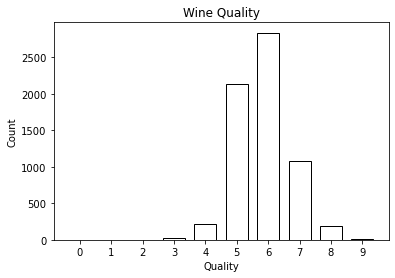

In [12]:
print("Total:",len(wine))

for i in range(1,11):  
    print("quality",i,":",len(wine[wine["quality"] == i]))
    
plt.hist(wine["quality"], range = (0,10), align = 'left', rwidth=0.7, color = "white" ,ec = "black")
plt.title("Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks(range(10))
plt.show()

# Upsampling

Upsampling will allow us to create artificial or duplicate data points to balance the class label for the wine qualities that are under represented in the training data. We used the quality of 6 as our resampling class to add artificial points to wine qualities 3,4,5,7,8,9. Then we remade our training and testing split data and used that to train our Random Forest Classification. However, this lead to a lower testing accuracy of 29.22%, this could be due to the classifier now underfitting the training data and not capturing that most of the wine fell into the quality of 6.

In [13]:
from sklearn.utils import resample

up_wine = resample(wine[wine["quality"] == 6],
             replace=True,
             n_samples=500,
             random_state=42)
for quality in [3, 4, 5, 7, 8, 9]:
    upsample = resample(wine[wine["quality"] == quality],
             replace=True,
             n_samples=500,
             random_state=42)
    up_wine = pd.concat([up_wine, upsample], ignore_index=True, sort=False)

Y1_up = up_wine['color']
Y2_up = up_wine['quality']
X_up = up_wine.drop(['color','quality'], axis = 1) #extract the predictor and target variables 

# train one model to learn to classify the color
X1_train_up, X1_test_up, Y1_train_up, Y1_test_up = train_test_split(X_up,Y1_up,test_size = 0.8, random_state=1)

# second model to classify the quality
X2_train_up, X2_test_up, Y2_train_up, Y2_test_up = train_test_split(X_up,Y2_up,test_size = 0.8, random_state=1)


In [14]:
clf_forest2_up = RandomForestClassifier(max_depth=3, random_state=0)
clf_forest2_up.fit(X2_train_up, Y2_train_up)

print(clf_forest2_up.score(X2_test_up, Y2_test_up))
print(clf_forest2_up.score(X2_test, Y2_test))


0.4878571428571429
0.29222777991535204


# Using SMOTE with Random Forests

SMOTE (Synthetic Minority Oversampling Technique) helps us increase the number of cases in our dataset in a balanced way. This works by generating new instances from existing under represented class cases that we supply as inputs. This is another method for balancing our dataset so that our classifier does not over train on the samples with the quality being 6. After resplitting our data with this technique, the Random Forest Classifier was able to acheive a testing accuracy of 62.60% which is higher than the testing accuracy when using upsampling. 

In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42,k_neighbors = 3)
X_res, y_res = sm.fit_resample(X, Y2)
X2_train_res, X2_test_res, Y2_train_res, Y2_test_res = train_test_split(X_res,y_res,test_size = 0.8, random_state=1)

clf_forest2_res = RandomForestClassifier(max_depth=15, random_state=0)
clf_forest2_res.fit(X2_train_res, Y2_train_res)

print(clf_forest2_res.score(X2_test_res, Y2_test_res))
print(clf_forest2_res.score(X2_test, Y2_test))


0.7830248079586953
0.6260100038476337


# PCA with SVM and SMOTE

In [16]:
PCA_Y = y_res.replace({3 : "low", 4 : "low", 5 : "mid", 6 : "mid", 7 : "mid", 8 : "high", 9 : "high"})
PCA_Y.value_counts()

mid     8508
low     5672
high    5672
Name: quality, dtype: int64

In [17]:
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = pd.DataFrame(min_max_scaler.fit_transform(X_res), columns=X_res.columns, index=X_res.index)
train_vectors, test_vectors, train_labels,test_labels = train_test_split(features_norm, PCA_Y,
                               random_state = 3077)

In [19]:
n_components = 1

pca = PCA(n_components= n_components, whiten=True)

_ = pca.fit(train_vectors)

pca_train_vectors = pca.transform(train_vectors)
pca_test_vectors = pca.transform(test_vectors)
total_variance = np.sum(pca.explained_variance_ratio_)
param_grid = {'C' : [1],
                'gamma': [1e-06],
                'kernel': ['linear']}
clf = GridSearchCV(SVC(), param_grid, cv = 5, n_jobs = -1)
clf = clf.fit(pca_train_vectors, train_labels)
pred_labels = clf.predict(pca_test_vectors)
acc_score = accuracy_score(test_labels, pred_labels)
print(classification_report(test_labels, pred_labels))
print(confusion_matrix(test_labels, pred_labels))

              precision    recall  f1-score   support

        high       0.58      0.68      0.63      1413
         low       0.00      0.00      0.00      1419
         mid       0.48      0.75      0.59      2131

    accuracy                           0.51      4963
   macro avg       0.35      0.48      0.40      4963
weighted avg       0.37      0.51      0.43      4963

[[ 956    0  457]
 [ 153    0 1266]
 [ 534    0 1597]]


/Users/bryanjurado/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bryanjurado/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bryanjurado/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
print(pd.DataFrame(pca.components_,
                   columns=features_norm.columns,index = ['PC-1']))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
PC-1      -0.129436         -0.012847    -0.007984        -0.15007  -0.107622   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
PC-1            -0.073232             -0.255753 -0.222954  0.231105   

      sulphates   alcohol  
PC-1  -0.030175  0.879837  


In [21]:
def PCA_feature_finder(x):
    n_components = x

    pca = PCA(n_components= n_components, whiten=True)

    _ = pca.fit(train_vectors)

    pca_train_vectors = pca.transform(train_vectors)
    pca_test_vectors = pca.transform(test_vectors)
    total_variance = np.sum(pca.explained_variance_ratio_)
    param_grid = {'C' : [1],
                  'gamma': [1e-6],
                  'kernel': ['linear']}
    clf = GridSearchCV(SVC(), param_grid, cv = 5, n_jobs = -1)
    clf = clf.fit(pca_train_vectors, train_labels)
    pred_labels = clf.predict(pca_test_vectors)
    acc_score = accuracy_score(test_labels, pred_labels)
    return acc_score, total_variance

Text(0, 0.5, 'accuracy score')

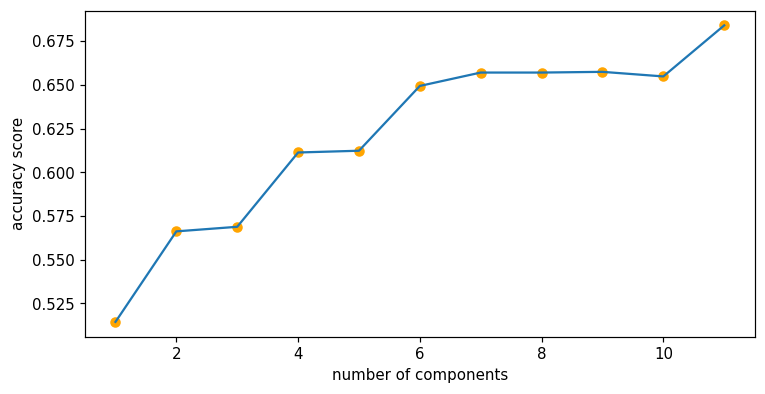

In [22]:
accuracy_scores = []
for x in range(1,12):
    accuracy_scores.append(PCA_feature_finder(x)[0])
dpi = 108  
plt.rcParams['figure.dpi'] = dpi
plt.figure(figsize = (8,4))
plt.plot(range(1,12), accuracy_scores)
plt.scatter(range(1,12), accuracy_scores, color = 'orange')
plt.xlabel('number of components')
plt.ylabel('accuracy score')

# PCA with Random Forest and SMOTE

In [23]:
PCA_Y = y_res.replace({3 : "low", 4 : "low", 5 : "mid", 6 : "mid", 7 : "mid", 8 : "high", 9 : "high"})
PCA_Y.value_counts()

mid     8508
low     5672
high    5672
Name: quality, dtype: int64

In [24]:
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = pd.DataFrame(min_max_scaler.fit_transform(X_res), columns=X_res.columns, index=X_res.index)
train_vectors, test_vectors, train_labels,test_labels = train_test_split(features_norm, PCA_Y,
                               random_state = 3077)

In [27]:
def PCA_feature_finder(x):
    n_components = x

    pca = PCA(n_components= n_components, whiten=True)

    _ = pca.fit(train_vectors)

    pca_train_vectors = pca.transform(train_vectors)
    pca_test_vectors = pca.transform(test_vectors)
    total_variance = np.sum(pca.explained_variance_ratio_)
    clf = RandomForestClassifier(max_depth=15, random_state=0)
    clf = clf.fit(pca_train_vectors, train_labels)
    pred_labels = clf.predict(pca_test_vectors)
    acc_score = accuracy_score(test_labels, pred_labels)
    return acc_score, total_variance

Text(0, 0.5, 'accuracy score')

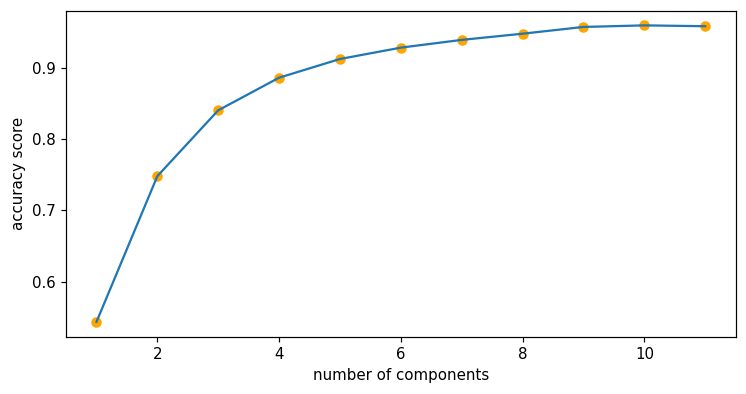

In [28]:
accuracy_scores = []
for x in range(1,12):
    accuracy_scores.append(PCA_feature_finder(x)[0])
dpi = 108  
plt.rcParams['figure.dpi'] = dpi
plt.figure(figsize = (8,4))
plt.plot(range(1,12), accuracy_scores)
plt.scatter(range(1,12), accuracy_scores, color = 'orange')
plt.xlabel('number of components')
plt.ylabel('accuracy score')

# PCA with Decision Trees and SMOTE

In [30]:
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = pd.DataFrame(min_max_scaler.fit_transform(X_res), columns=X_res.columns, index=X_res.index)
train_vectors, test_vectors, train_labels,test_labels = train_test_split(features_norm, PCA_Y,
                               random_state = 3077)

In [31]:
def PCA_feature_finder(x):
    n_components = x

    pca = PCA(n_components= n_components, whiten=True)

    _ = pca.fit(train_vectors)

    pca_train_vectors = pca.transform(train_vectors)
    pca_test_vectors = pca.transform(test_vectors)
    total_variance = np.sum(pca.explained_variance_ratio_)
    clf = DecisionTreeClassifier(random_state=0)
    clf = clf.fit(pca_train_vectors, train_labels)
    pred_labels = clf.predict(pca_test_vectors)
    acc_score = accuracy_score(test_labels, pred_labels)
    return acc_score, total_variance

Text(0, 0.5, 'accuracy score')

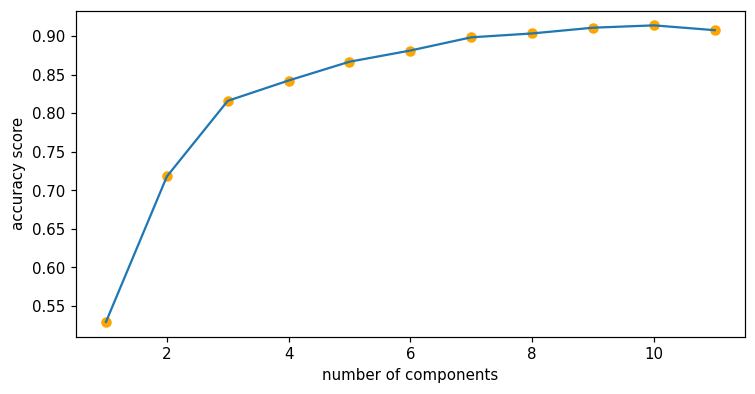

In [32]:
accuracy_scores = []
for x in range(1,12):
    accuracy_scores.append(PCA_feature_finder(x)[0])
dpi = 108  
plt.rcParams['figure.dpi'] = dpi
plt.figure(figsize = (8,4))
plt.plot(range(1,12), accuracy_scores)
plt.scatter(range(1,12), accuracy_scores, color = 'orange')
plt.xlabel('number of components')
plt.ylabel('accuracy score')